Storing X1 ... Xn, Q and output answer a.

Dictionary V has x,q,a

we will find continuous representation for the x and q.



#End to End Memory Network

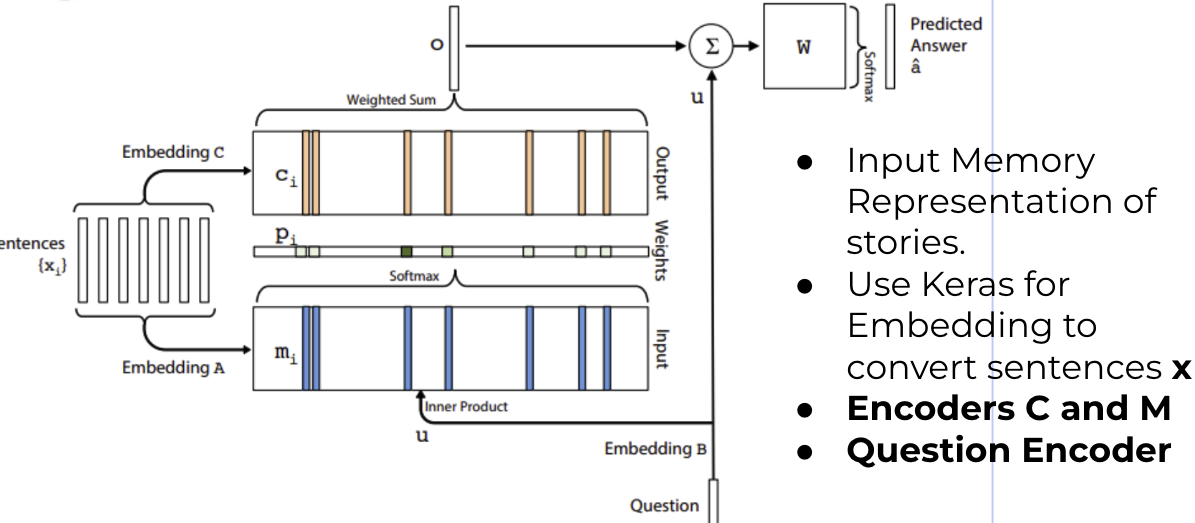

#Data


Full Details: https://research.fb.com/downloads/babi/

In [ ]:
import pickle
import numpy as np
with open("train_qa.txt", "rb") as fp:   # Unpickling
    train_data =  pickle.load(fp)

with open("test_qa.txt", "rb") as fp:   # Unpickling
    test_data =  pickle.load(fp)

In [ ]:
type(train_data), type(test_data)

(list, list)

In [ ]:
len(train_data), len(test_data)

(10000, 1000)

In [ ]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [ ]:
' '.join(train_data[0][0]) #Story

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [ ]:
' '.join(train_data[0][1]) #Question

'Is Sandra in the hallway ?'

In [ ]:
train_data[0][2] #Answer

'no'

#Setting up Vocabulary of All Words

In [ ]:
# Create a set that holds the vocab words
vocab = set()
all_data = test_data + train_data

for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

vocab.add('no')
vocab.add('yes')

In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
vocab_len = len(vocab) + 1 #we add an extra space to hold a 0 for Keras's pad_sequences
max_story_len = max([len(data[0]) for data in all_data])
max_story_len

156

In [ ]:
max_question_len = max([len(data[1]) for data in all_data])
max_question_len

6

##Vectorizing

In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
vocab_size = len(vocab) + 1 # Reserve 0 for pad_sequences



In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# integer encode sequences of words
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

tokenizer.word_index

{'hallway': 1,
 'garden': 2,
 'to': 3,
 'back': 4,
 'down': 5,
 'yes': 6,
 'kitchen': 7,
 'got': 8,
 'up': 9,
 'apple': 10,
 'football': 11,
 'travelled': 12,
 'sandra': 13,
 '?': 14,
 'daniel': 15,
 'journeyed': 16,
 'is': 17,
 'discarded': 18,
 'left': 19,
 'picked': 20,
 'took': 21,
 'no': 22,
 'went': 23,
 'bathroom': 24,
 'put': 25,
 'milk': 26,
 'the': 27,
 'mary': 28,
 'grabbed': 29,
 'office': 30,
 '.': 31,
 'bedroom': 32,
 'john': 33,
 'moved': 34,
 'there': 35,
 'dropped': 36,
 'in': 37}

In [ ]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

#Creating Story Sequence
train_story_seq = tokenizer.texts_to_sequences(train_story_text)
len(train_story_text), len(train_story_seq)

(10000, 10000)

In [ ]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT:

    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:

    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.

    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''


    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []


    for story, query, answer in data:

        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]

        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)

        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1

        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)

    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.

    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [ ]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)
inputs_test, queries_test, answers_test = vectorize_stories(test_data)
inputs_test

array([[ 0,  0,  0, ..., 27, 32, 31],
       [ 0,  0,  0, ..., 27,  2, 31],
       [ 0,  0,  0, ..., 27,  2, 31],
       ...,
       [ 0,  0,  0, ..., 27, 10, 31],
       [ 0,  0,  0, ..., 27,  2, 31],
       [ 0,  0,  0, ..., 10, 35, 31]], dtype=int32)

In [ ]:
queries_test

array([[17, 33, 37, 27,  7, 14],
       [17, 33, 37, 27,  7, 14],
       [17, 33, 37, 27,  2, 14],
       ...,
       [17, 28, 37, 27, 32, 14],
       [17, 13, 37, 27,  2, 14],
       [17, 28, 37, 27,  2, 14]], dtype=int32)

In [ ]:
tokenizer.word_index['no']

22

#Model

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

input_sequence = Input((max_story_len,))
question = Input((max_question_len,))



##Encoder

###Input Encoder M

In [ ]:
# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)

###Input Encoder C

In [ ]:
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

###Question Encoder

In [ ]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

###Enocode the Sequence

In [ ]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

Use dot product to compute the match between first input vector seq and the query

In [ ]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

##Model Connection

In [ ]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential (Sequential)     (None, None, 64)             2432      ['input_1[0][0]']             
                                                                                                  
 sequential_2 (Sequential)   (None, 6, 64)                2432      ['input_2[0][0]']             
                                                                                              

##Train

In [ ]:

history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120
313/313 [==============================] - 13s 14ms/step - loss: 0.8861 - accuracy: 0.5027 - val_loss: 0.6946 - val_accuracy: 0.4970
Epoch 2/120
313/313 [==============================] - 4s 11ms/step - loss: 0.7040 - accuracy: 0.5077 - val_loss: 0.6940 - val_accuracy: 0.4970
Epoch 3/120
313/313 [==============================] - 2s 6ms/step - loss: 0.6977 - accuracy: 0.5092 - val_loss: 0.6937 - val_accuracy: 0.4970
Epoch 4/120
313/313 [==============================] - 2s 6ms/step - loss: 0.6965 - accuracy: 0.5053 - val_loss: 0.6956 - val_accuracy: 0.4970
Epoch 5/120
313/313 [==============================] - 2s 6ms/step - loss: 0.6956 - accuracy: 0.5050 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 6/120
313/313 [==============================] - 3s 10ms/step - loss: 0.6958 - accuracy: 0.4954 - val_loss: 0.6960 - val_accuracy: 0.5030
Epoch 7/120
313/313 [==============================] - 4s 12ms/step - loss: 0.6956 - accuracy: 0.4972 - val_loss: 0.6935 - val_accuracy: 0

##Saving Model

In [ ]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Evaluating Model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


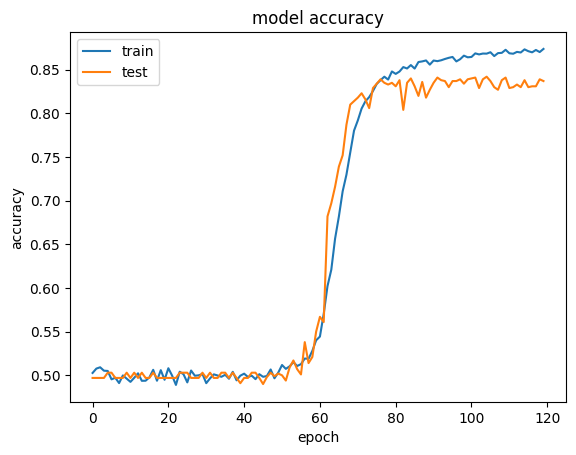

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#One Example

In [ ]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

test_data[0][0]

32/32 [==============================] - 0s 3ms/step


['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [ ]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [ ]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [ ]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


#Generate prediction from model

In [ ]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9999566


#Writing a Story and Questions and Predict the Answer

In [ ]:
vocab


{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

##Story

In [ ]:
# Note the whitespace of the periods
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

##Question

In [ ]:
my_question = "Is the football in the garden ?"
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [ ]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [ ]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [ ]:
pred_results = model.predict(([ my_story, my_ques]))

1/1 [==============================] - 0s 25ms/step


##Generate prediction from model

In [ ]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.97938275
